<h1>Pre-1790 Data Analysis</h1>

- Barplot of debt distribution 

- Debt distribution by gender

- Top ten richest individual debt holders - biographies 

If time: find out if any const. convention or society of the cincinatti members had debt holdings 

<h2>Debt Distribution</h2>

Two barplots: 
1. The total amount of debt held by each bracket 
2. The percentage of total debt held by each bracket 
 

In [2]:
# import necessary packages and import aggregated debt file 
import pandas  
agg_debt = pandas.read_csv("../data/agg_debt_grouped.csv")

# remove rows where no name exists 
agg_debt.drop(agg_debt.loc[agg_debt["to whom due | first name"].isna() & agg_debt["to whom due | last name"].isna()].index, inplace=True)

# new column for total amount of debt
agg_debt[["amount | dollars", "amount in specie | dollars", "amount in specie | cents"]] = agg_debt[["amount | dollars", "amount in specie | dollars", "amount in specie | cents"]].fillna(0)
agg_debt["amount_total"] = agg_debt["amount | dollars"] + agg_debt["amount in specie | dollars"] + agg_debt["amount in specie | cents"]
agg_debt.head()

# create full name column 
agg_debt["full_name"] = agg_debt["to whom due | first name"] + " " + agg_debt["to whom due | last name"]

# sort by amount of debt 
agg_debt_sorted = agg_debt.sort_values(by="amount_total", ascending=False)
agg_debt_sorted.head()


C:\Users\david\AppData\Local\Temp\ipykernel_30816\4109341258.py:3: DtypeWarning: Columns (1,7,9,10,12,14,15,19,20,21,23,30) have mixed types. Specify dtype option on import or set low_memory=False.
  agg_debt = pandas.read_csv("../data/agg_debt_grouped.csv")


,Unnamed: 0,letter,date of the certificate | month,date of the certificate | day,date of the certificate | year,to whom due | first name,to whom due | last name,to whom due | title,time when the debt became due | month,time when the debt became due | day,...,amount in specie | cents,amount | 8th,delivered | month,delivered | day,delivered | year,total dollars | notes,total dollars | notes.1,final_agg_debt index,amount_total,full_name
91257,91257,NaN,4.0,17.0,1780.0,John Jacob,Faish,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,186282 | 186283 | 186284 | 186285 | 186286 | 1...,464750.0000,John Jacob Faish
91844,91844,NaN,9.0,27.0,1780.0,Mons,Monbos,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,190662 | 190663 | 190664 | 190665 | 190666 | 1...,219125.0000,Mons Monbos
97417,97417,NaN,1.0,8.0,1780.0,Jesse Taylor,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,202275 | 202276 | 202277 | 202278,206320.4440,NaN
68278,68278,NaN,12.0,31.0,1779.0,William,Dennie,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,136206 | 136207 | 136208 | 136209 | 136210 | 1...,200341.8056,William Dennie
89596,89596,NaN,12.0,6.0,1779.0,Samuel,Delap,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,180875 | 180876 | 180877 | 180878 | 180879 | 1...,196151.1667,Samuel Delap


In [4]:
# split into 4 groups
import numpy as np 
agg_debt_split = np.array_split(agg_debt_sorted, 4)
amounts = [round(agg_debt_split[i]["amount_total"].sum() / 1000000, 2) for i in range(4)]
for i in range(4):
    print(amounts[i])

65.25
8.58
2.44
0.44


[24517, 24517, 24517, 24516]


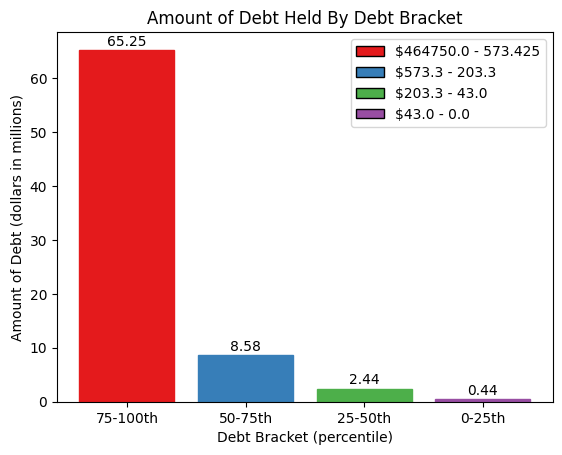

In [41]:
# graph amount of debt held by each wealth bracket 
import matplotlib.pyplot as plt
bars = plt.bar(x=range(4), height=amounts, tick_label=["75-100th", "50-75th", "25-50th", "0-25th"])
bars[0].set_color("#e41a1c")
bars[1].set_color("#377eb8")
bars[2].set_color("#4daf4a")
bars[3].set_color("#984ea3")

# add labels 
plt.xlabel("Debt Bracket (percentile)")
plt.ylabel("Amount of Debt (dollars in millions)")
plt.bar_label(bars, padding=1)
plt.title("Amount of Debt Held By Debt Bracket")
plt.savefig("results/debt_by_bracket.png")

boundary_0 = agg_debt_split[0]["amount_total"].iloc[0]
boundary_1 = agg_debt_split[0]["amount_total"].iloc[-1]
boundary_2 = agg_debt_split[1]["amount_total"].iloc[-1]
boundary_3 = agg_debt_split[2]["amount_total"].iloc[-1]
boundary_4 = agg_debt_split[3]["amount_total"].iloc[-1]

number_of_people = [agg_debt_split[i].shape[0] for i in range(4)]

print(number_of_people)

labels = ["$" + str(agg_debt_split[0]["amount_total"].iloc[0]) + " - " + str(agg_debt_split[0]["amount_total"].iloc[-1]), 
          "$" + str(agg_debt_split[1]["amount_total"].iloc[0]) + " - " + str(agg_debt_split[1]["amount_total"].iloc[-1]),
          "$" + str(agg_debt_split[2]["amount_total"].iloc[0]) + " - " + str(agg_debt_split[2]["amount_total"].iloc[-1]),
          "$" + str(agg_debt_split[3]["amount_total"].iloc[0]) + " - " + str(agg_debt_split[3]["amount_total"].iloc[-1])]

handles = [plt.Rectangle((0,0),1,1, color=c, ec="k") for c in ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3"]]

plt.legend(handles=handles, labels=labels)
plt.savefig("results/debt_by_bracket.png")
plt.show()

[85.1, 11.2, 3.2, 0.6]


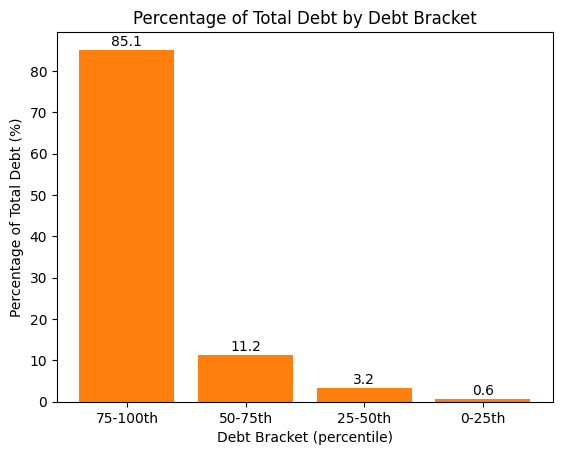

In [43]:
# calculate percentage of total wealth each bracket holds 
total_amt = agg_debt["amount_total"].sum() / 1000000
percentages = [round(((amounts[i] / total_amt) * 100), 1) for i in range(4)] 

print(percentages)

# graph percentages # add labels 
plt.bar(["75-100th", "50-75th", "25-50th", "0-25th"], percentages)
plt.xlabel("Debt Bracket (percentile)")
plt.ylabel("Percentage of Total Debt (%)")
plt.bar_label(plt.bar(["75-100th", "50-75th", "25-50th", "0-25th"], percentages), padding=1)
plt.title("Percentage of Total Debt by Debt Bracket")
plt.savefig("results/percent_debt_by_debt_bracket.png")
plt.show()

<h2>Women Versus Men</h2>
Barplot: compare amount of debt held by women versus men using NLTK 

In [3]:
import gender_guesser.detector as gender
d = gender.Detector(case_sensitive=False)

# cast type of first name column to string
agg_debt["to whom due | first name"] = agg_debt["to whom due | first name"].astype(str)

In [4]:
def count_genders(name):
    if d.get_gender(name, country="usa") == "male":
        return "Male"
    elif d.get_gender(name, country="usa") == "female":
        print(name)
        return "Female"
    else:
        return "Unknown"

In [5]:
# run gender detector on entire dataset 
agg_debt["gender_prediction"] = agg_debt["to whom due | first name"].apply(count_genders) 
count = agg_debt["gender_prediction"].value_counts(normalize=True) * 100
print(count)

Elizabeth
Martha
Joanna
Susanna
Betty
Sarah
Maria
Ann
Rachel
Charity
Rachel
Sarah
Elizabeth
Rachel
Elizabeth
Jane
Abigail
Deborah
Hannah
Jane
Jane
Sophia
Catharine
Sarah
Martha
Susan
Cathrine
Jane
Rebecca
Sarah
Racheal
Sarah
Elizabeth
Hannah
Jane
Jane
Sarah
Sarah
Elizabeth
Catharine
Denise
Rebecca
Martha
Catharine
Sarah
Catharine
Hannah
Abigail
Charity
Hannah
Sarah
Grace
Esther
Sarah
Esther
Lydia
Eden
Sarah
Sarah
Abigail
Esther
Sarah
Hannah
Susanna
Christina
Eve
Sarah
Rachel
Rachel
Rebeca
Elizabeth
Rebecca
Polly
Caroline
Rachel
Sarah
Margaret
Rebecca
Deborah
Polly
Elizabeth
Ruth
Lena
Hannah
Theodora
Jane
Rachel
Elizabeth
Eleanor
Abigail
Elizabeth
Sarah
Susanna
Sarah
Jane
Sarah
Hannah
Elizabeth
Maria
Margaret
Nancy
Catharine
Susan
Margaret
Ann
Betty
Catharine
Ann
Elizabeth
Elizabeth
Margaret
Catharine
Elizabeth
Martha
Margaret
Rachael
Ann
Margaret
Hannah
Ann
Ann
Maria
Anne
Martha
Martha
Ann
Jane
Esther
Ann
Ann
Sarah
Ann
Martha
Sarah
Margaret
Ruth
Patience
Margaret
Catharine
Lydia
Caroli

[Text(0, 1, '49.9179'), Text(0, 1, '45.9166'), Text(0, 1, '4.16552')]

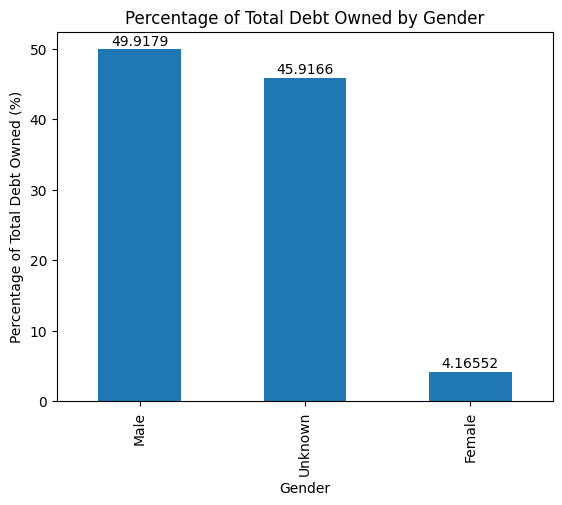

In [10]:
# graph 
ax = count.plot.bar(xlabel="Gender", ylabel="Percentage of Total Debt Owned (%)", title="Percentage of Total Debt Owned by Gender")
ax.bar_label(ax.containers[0], padding=1)

<h2>Top Ten Debt Holders</h2>

I researched the top ten debt holders from the pre-1790 data to find additional information and individual biographies. 

https://docs.google.com/document/d/1osUkB6xTnMBxe5OmWnL07VEh2e97iFr1a9YNku51MBc/edit?usp=sharing 

In [11]:
# get the top ten debt holders from sorted dataset
richest_names = agg_debt_sorted.head(10)[["to whom due | first name", "to whom due | last name", "amount_total", "state", "date of the certificate | year"]]
richest_names

,to whom due | first name,to whom due | last name,amount_total,state,date of the certificate | year
91257,John Jacob,Faish,464750.0000,pa,1780.0
91844,Mons,Monbos,219125.0000,pa,1780.0
97417,Jesse Taylor,NaN,206320.4440,va,1780.0
68278,William,Dennie,200341.8056,ma,1779.0
89596,Samuel,Delap,196151.1667,pa,1779.0
79217,John,Stevens,185925.0000,nj,1780.0
90159,James,Logan,172058.0000,pa,1780.0
91756,Jonathan,Hudson,171125.0000,pa,1780.0
89957,Ephraim,Blaine,156765.5556,pa,1780.0
91143,John,Benezett,135025.0000,pa,1780.0


In [12]:
agg_debt.columns

Index(['Unnamed: 0', 'letter', 'date of the certificate | month',
       'date of the certificate | day', 'date of the certificate | year',
       'to whom due | first name', 'to whom due | last name',
       'to whom due | title', 'time when the debt became due | month',
       'time when the debt became due | day',
       'time when the debt became due | year', 'amount | dollars',
       'amount | 90th', 'line strike through? | yes?',
       'line strike through? | note', 'notes', 'state', 'org_file',
       'org_index', 'to whom due | title.1', 'to whom due | first name.1',
       'to whom due | last name.1', 'amount | 10th', 'exchange',
       'amount in specie | dollars', 'amount in specie | cents',
       'amount | 8th', 'delivered | month', 'delivered | day',
       'delivered | year', 'total dollars | notes', 'total dollars | notes.1',
       'final_agg_debt index', 'amount_total', 'full_name',
       'gender_prediction'],
      dtype='object')

<h2>Society of Cincinatti Members and Debt Holdings</h2>

1. Find all members of the Society of Cincinatti who held debt - dataframe
2. Find out the percentage of total debt owned by society members - return a value

In [8]:
import re 

# remove military titles 
def remove_titles(officer):
    officer = officer.replace("Surgeonâ€™s", "").replace("Surgeon General", "") #remove doctor titles 

    if '.' in officer:
        return re.sub(',[^.]+.', ',', officer) 

    return officer

In [9]:

def clean(name_list):
    i = 0
    while i < len(name_list):
        name_list[i] = re.sub("\(.*?\)","", name_list[i]) # remove parantheses and everything inside them
        name_list[i] = name_list[i].replace(" and ", "") # remove '... and ...' 
        name_list[i] = re.sub("\[.*?\]","", name_list[i]) # remove [...]
        name_list[i] = remove_titles(name_list[i]) # remove titles 
        name_list[i] = name_list[i].strip() # remove endspaces 
        i += 1
    
    return name_list        

In [10]:
# open file with all members of the society
all_officers = open("data/society_members/all_officers_ari.txt", "r") 
all_officers = all_officers.read().splitlines() 
all_officers = [value for value in all_officers if value != '']

# get only massachusetts officers (state with most unclear names) 
mass_officers = []
for officer in all_officers:
    state = officer[officer.find("(")+1:officer.find(")")]
    if state == "Massachusetts":
        mass_officers.append(officer)

# remove military titles 
i = 0
while i < len(mass_officers):
    mass_officers[i] = remove_titles(remove_titles(mass_officers[i])) # running twice handles those who have two titles 
    mass_officers[i] = re.sub("\(.*?\)","", mass_officers[i])
    i += 1

# swap first and last names 
i = 0
while i < len(mass_officers):
    full_name_swapped = mass_officers[i].split(",")[1] + mass_officers[i].split(",")[0]
    full_name_swapped = full_name_swapped.strip()
    mass_officers[i] = full_name_swapped
    i += 1

# run cleaning function 
mass_officers = clean(mass_officers) 

print(mass_officers)

['Stephen Abbott', 'Amos Adams', 'Henry Adams', 'Samuel Adams', 'William Albee', 'Judah Alden', 'Nathaniel Alexander', 'John Allan', 'Noah Allen', 'Job Alvord', 'Jotham Ames', 'Samuel Armstrong', 'James Avery', 'Stephen Badlam', 'Richard Bagnell', 'Adams Bailey', 'Luther Bailey', 'John Bailey', 'Jeduthan Baldwin', 'Lebbeus Ball', 'James Bancroft', 'Ebenezer Bancroft', 'Edmund Bancroft', 'Seth Banister', 'John Barker', 'Joel Barlow', 'Rufus Barney', 'Mate Josiah Bartlett', 'Barachiah Bassett', 'Fortunatus Bassett', 'Joseph Bates', 'Hodijah Baylies', 'Samuel Benjamin', 'Silas Bent', 'Timothy Bigelow', 'EdwardBlake', 'Thomas Theodore Bliss', 'William Bond', 'Ralph Hart Bowles', 'Samuel Bowman', 'Solomon Bowman', 'Robert Bradford', 'Samuel Bradford', 'Gamaliel Bradford', 'GamalielBradford', 'David Bradley', 'John Brooks', 'Benjamin Brown', 'Oliver Brown', 'Edward Bugbee', 'John Bull', 'Silas Burbank', 'Henry Burbeck', 'William Burbeck', 'John Burges', 'John Burnham', 'James Buxton', 'John 

In [11]:
# import society members from each state
total_members = 0 
meta_register = {} # store all members in a dictionary with state as key and list of members as value

ct_file = open("data/society_members/connecticut.txt", "r")
ct_members = ct_file.read().split(",")
ct_members = clean(ct_members)
meta_register["ct"] = ct_members
total_members += len(ct_members)
#ct_members

de_file = open("data/society_members/delaware.txt", "r") 
de_members = de_file.read().split(",")
de_members = clean(de_members)
meta_register["de"] = de_members 
total_members += len(de_members)
#de_members

ga_file = open("data/society_members/georgia.txt", "r")
ga_members = ga_file.read().split(",")
ga_members = clean(ga_members)
meta_register["ga"] = ga_members 
total_members += len(ga_members)
#ga_members 

md_file = open("data/society_members/maryland.txt", "r")
md_members = md_file.read().split(",")
md_members = clean(md_members)
meta_register["md"] = md_members
total_members += len(md_members)
#md_members

nh_file = open("data/society_members/new_hampshire.txt", "r")
nh_members = nh_file.read().split(",")
nh_members = clean(nh_members)
meta_register["nh"] = nh_members
total_members += len(nh_members)
#nh_members

nj_file = open("data/society_members/new_jersey.txt", "r")
nj_members = nj_file.read().split(",")
nj_members = clean(nj_members)
meta_register["nj"] = nj_members
total_members += len(nj_members)
#nj_members 

ny_file = open("data/society_members/new_york.txt", "r")
ny_members = ny_file.read().split(",")
ny_members = clean(ny_members)
meta_register["ny"] = ny_members
total_members += len(ny_members)
#ny_members

pa_file = open("data/society_members/pennsylvania.txt", "r")
pa_members = pa_file.read().split(",")
pa_members = clean(pa_members)
meta_register["pa"] = pa_members
total_members += len(pa_members)
#pa_members

ri_file = open("data/society_members/rhode_island.txt", "r")
ri_members = ri_file.read().split(",")
ri_members = clean(ri_members)
meta_register["ri"] = ri_members
total_members += len(ri_members)
#ri_members

va_file = open("data/society_members/virginia.txt", "r")
va_members = va_file.read().split(",")
va_members = clean(va_members)
meta_register["va"] = va_members
total_members += len(va_members)
#va_members

nc_file = open("data/society_members/north_carolina.txt", "r")
nc_members = nc_file.read().split(",")
nc_members = clean(nc_members)
meta_register["nc"] = nc_members
total_members += len(nc_members)
#nc_members

In [13]:
# check for repeated names in the society of the cinccinati list 

# combine all members into one list
all_members = []
for key in meta_register:
    all_members += meta_register[key]

# check for repeated names
repeated_names = []
for name in all_members:
    if all_members.count(name) > 1:
        repeated_names.append(name)

print(repeated_names)
        

['Benjamin Tallmadge', 'Samuel B. Webb', 'James Moore', 'James Armstrong', 'George Mathews', 'Richard Pindell', 'Joshua Barney', 'James Armstrong', 'James Smith', 'John Jordan', 'John Hughes', 'John Smith', 'John Smith', 'James G. Heron', 'Richard Pindell', 'William Barton', 'John Conway', 'James Giles', 'Luther Halsey', 'Robert Pemberton', 'John Reed', 'John Reed', 'Aaron Burr', 'George Clinton', 'James Clinton', 'John Doughty', 'Nicholas Fish', 'Peter Gansevoort', 'Alexander Hamilton', 'Joseph Hardy', 'John Keese', 'John Lamb', 'Morgan Lewis', 'Alexander McDougall', 'Charles McKnight', 'Philip Schuyler', 'Ebenezer Stevens', 'Silas Talbot', 'Benjamin Tallmadge', 'Cornelius Van Dyck', 'John Van Dyck', 'Richard Varick', 'William Scudder', 'Bernardus Swartwout', 'Cornelius Swartwout', 'David Brooks', 'Aaron Burr', 'James Clinton', 'George Clinton', 'John Conway', 'James Davidson', 'Samuel Dodge', 'Samuel Dodge', 'John Doughty', 'Nicholas Fish', 'Peter Gansevoort', 'James Giles', 'John Gr

In [15]:
# create dataframe with only society members
members_owned_debt = pandas.DataFrame(columns=["full_name", "amount_total", "state", "org_file"])
for state in meta_register:
    society_members_per_state = agg_debt[agg_debt["full_name"].isin(meta_register[state]) & agg_debt["state"].isin([state])]
    members_owned_debt = pandas.concat([members_owned_debt, society_members_per_state[["full_name", "amount_total", "state", "org_file"]]], ignore_index=True)
members_owned_debt.tail()

,full_name,amount_total,state,org_file
497,Jeremiah Olney,2.0,ri,liquidated_debt_certificates_RI.xlsx
498,William Jones,6.0,ri,liquidated_debt_certificates_RI.xlsx
499,Silas Talbot,75.0,ri,liquidated_debt_certificates_RI.xlsx
500,William Tew,8.0,ri,liquidated_debt_certificates_RI.xlsx
501,James Mitchell Varnum,977.0,ri,liquidated_debt_certificates_RI.xlsx


In [16]:
# find out how many members own debt
num_owned_debt = len(members_owned_debt["full_name"].unique())
print(num_owned_debt)

172


In [19]:
# group by name and state
funcs = {"amount_total": "sum", "org_file": "first"}
members_owned_debt = members_owned_debt.groupby(["full_name", "state"]).agg(funcs).reset_index()
members_owned_debt.tail()

,full_name,state,amount_total,org_file
168,William Smallwood,md,1042.75000,loan_office_certificates_9_states.xlsx
169,William Stewart,ny,445.00000,liquidated_debt_certificates_NY.xlsx
170,William Tew,ri,12.00000,liquidated_debt_certificates_RI.xlsx
171,William Thompson,pa,2358.09305,liquidated_debt_certificates_PA_stelle.xlsx
172,Zebulon Pike,pa,15.00000,liquidated_debt_certificates_PA_stelle.xlsx


In [20]:
# save to csv
members_owned_debt.to_csv("results/members/members_owned_debt.csv")

In [21]:
# calculate the percentage of cincinatti members that owned debt 
(num_owned_debt / total_members) * 100

17.131474103585656

In [20]:
agg_debt 

,Unnamed: 0,letter,date of the certificate | month,date of the certificate | day,date of the certificate | year,to whom due | first name,to whom due | last name,to whom due | title,time when the debt became due | month,time when the debt became due | day,...,amount | 8th,delivered | month,delivered | day,delivered | year,total dollars | notes,total dollars | notes.1,final_agg_debt index,amount_total,full_name,gender_prediction
0,0,C,8.0,27.0,1783.0,Elizabeth,Lowell,NaN,4.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,7.0,Elizabeth Lowell,Female
1,1,L,8.0,27.0,1783.0,Joshua,Brackett,Jun,4.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1 | 2,32.0,Joshua Brackett,Male
2,2,C,9.0,2.0,1783.0,Phillips,White,Esq,4.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3,8.0,Phillips White,Unknown
3,3,B,9.0,2.0,1783.0,William,White,NaN,4.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4,27.0,William White,Male
4,4,A,9.0,4.0,1783.0,Joshua,Wentworth,Esq,4.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5,31.0,Joshua Wentworth,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98092,98092,G,5.0,18.0,1789.0,Henry,Johnson,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,203065,268.0,Henry Johnson,Male
98093,98093,N,5.0,26.0,1789.0,William,Smith,NaN,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,203066,636.0,William Smith,Male
98094,98094,P,5.0,28.0,1789.0,James,Odell,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,Reg 6768,NaN,203067,216.0,James Odell,Male
98095,98095,H,4.0,28.0,1789.0,nan,Hoov,NaN,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,203068,313.0,NaN,Female


In [19]:
# calculate the percentage of total debt owned by cincinatti members
(members_owned_debt["amount_total"].sum() / agg_debt["amount_total"].sum()) * 100

0.988664121012981

<h1>Constitutional Convention Delegates</h1>

In [22]:
const_delegates = pandas.read_excel("../../../data_raw/delegates/constitutional_convention_1787.xlsx", header=2)
const_delegates["full_name"] = const_delegates["first name"] + " " + const_delegates["last name"]
const_delegates["state"] = const_delegates["state"].str.strip()

# map state names to abbreviations
state_map = {"Connecticut": "ct", "Delaware": "de", "Georgia": "ga", "Maryland": "md", "Massachusetts": "ma", "New Hampshire": "nh", "New Jersey": "nj", "New York": "ny", "North Carolina": "nc", "Pennsylvania": "pa", "Rhode Island": "ri", "South Carolina": "sc", "Virginia": "va"}
const_delegates["state"] = const_delegates["state"].map(state_map)
const_delegates.head()

,first name,last name,state,sign?,full_name
0,William Samuel,Johnson,ct,yes,William Samuel Johnson
1,Roger,Sherman,ct,yes,Roger Sherman
2,Oliver,Ellsworth (Elsworth),ct,no,Oliver Ellsworth (Elsworth)
3,George,Read,de,yes,George Read
4,Gunning,Bedford Jr.,de,yes,Gunning Bedford Jr.


In [37]:
agg_debt.head()

,Unnamed: 0,Group Name,Group State,Group County,Group Town,Group Name Type,Group Match Index,Group Match Url,Full Search Name,assets,...,6p_def_total,unpaid_interest,6p_total_adj,6p_def_total_adj,unpaid_interest_adj,final_total,final_total_adj,state,full_name,amount_total
0,0,Desdeily,NY,NaN,NaN,state,NaN,NaN,Desdeily,"NY_1947_1 : 0.0, 0.0, 5140.86",...,0.00,5140.86,0.00,0.00,5140.86,0.00,0.00,ny,Desdeily,0.00
1,1,Grund,NY,NaN,NaN,state,NaN,NaN,Grund,"NY_1865_1 : 0.0, 0.0, 10000.0 | NY_1866_1 : 0....",...,0.00,19986.00,0.00,0.00,19986.00,0.00,0.00,ny,Grund,0.00
2,2,Aaron Bourn,RI,Bristol County,Bristol,town,2435,https://www.ancestrylibrary.com/search/collect...,Aaron Bourn,"RI_322_1 : 206.37, 103.18, 258.26",...,103.18,258.26,206.37,103.18,258.26,309.55,309.55,ri,Aaron Bourn,309.55
3,3,Aaron Bull,CT,Hartford County,Hartford,town,74,https://www.ancestrylibrary.com/search/collect...,Aaron Bull,"CT_78_1 : 61.3, 30.66, 16.05",...,30.66,16.05,61.30,30.66,16.05,91.96,91.96,ct,Aaron Bull,91.96
4,4,Aaron Caldwell II,CT,Hartford County,Hartford,town,NaN,https://www.ancestrylibrary.com/search/collect...,Aaron Cadwell Ii | Aaron Caldwell Ii,"CT_98_1 : 9.25, 4.63, 0.0",...,4.63,0.00,9.25,4.63,0.00,13.88,13.88,ct,Aaron Caldwell II,13.88


In [38]:
# create dataframe with only state delegate members that held debt 
exists_in_both = const_delegates.merge(agg_debt, on=["full_name", "state"], how="inner")
exists_in_both = exists_in_both[["full_name", "amount_total", "state"]]
exists_in_both_gdf = exists_in_both.groupby(["full_name", "state"]).agg({"amount_total": "sum"}).reset_index()
exists_in_both_gdf

,full_name,state,amount_total


In [24]:
const_delegates.head()

,first name,last name,state,sign?,full_name
0,William Samuel,Johnson,ct,yes,William Samuel Johnson
1,Roger,Sherman,ct,yes,Roger Sherman
2,Oliver,Ellsworth (Elsworth),ct,no,Oliver Ellsworth (Elsworth)
3,George,Read,de,yes,George Read
4,Gunning,Bedford Jr.,de,yes,Gunning Bedford Jr.


<h1>State Delegates</h1>

In [25]:
# create dataframe with only state delegate members
state_delegates = pandas.read_excel("../../../data_raw/delegates/State Delegates.xlsx", header=2)
state_delegates["First Name"] = state_delegates["First Name"].fillna("")
state_delegates["Last Name"] = state_delegates["Last Name"].fillna("")
state_delegates["full_name"] = state_delegates["First Name"] + " " + state_delegates["Last Name"] 
state_delegates["state"] = state_delegates["State"].str.lower()
state_delegates.head()

,Last Name,First Name,Position,State,County / Town,Vote,full_name,state
0,Stevens,John,President,NJ,Hunterdon,yes,John Stevens,nj
1,Fell,John,NaN,NJ,Bergen,yes,John Fell,nj
2,Zabriskie,Peter,NaN,NJ,Bergen,yes,Peter Zabriskie,nj
3,Hennion,Cornelius,NaN,NJ,Bergen,yes,Cornelius Hennion,nj
4,Chetwood,John,NaN,NJ,Essex,yes,John Chetwood,nj


In [31]:
# check post 1790 data 
agg_debt = pandas.read_csv("../../../data_clean/final_data_CD.csv")
agg_debt["state"] = agg_debt["Group State"].str.lower()
agg_debt["full_name"] = agg_debt["Group Name"]
agg_debt["amount_total"] = agg_debt["final_total_adj"]
agg_debt.head()

,Unnamed: 0,Group Name,Group State,Group County,Group Town,Group Name Type,Group Match Index,Group Match Url,Full Search Name,assets,...,6p_def_total,unpaid_interest,6p_total_adj,6p_def_total_adj,unpaid_interest_adj,final_total,final_total_adj,state,full_name,amount_total
0,0,Desdeily,NY,NaN,NaN,state,NaN,NaN,Desdeily,"NY_1947_1 : 0.0, 0.0, 5140.86",...,0.00,5140.86,0.00,0.00,5140.86,0.00,0.00,ny,Desdeily,0.00
1,1,Grund,NY,NaN,NaN,state,NaN,NaN,Grund,"NY_1865_1 : 0.0, 0.0, 10000.0 | NY_1866_1 : 0....",...,0.00,19986.00,0.00,0.00,19986.00,0.00,0.00,ny,Grund,0.00
2,2,Aaron Bourn,RI,Bristol County,Bristol,town,2435,https://www.ancestrylibrary.com/search/collect...,Aaron Bourn,"RI_322_1 : 206.37, 103.18, 258.26",...,103.18,258.26,206.37,103.18,258.26,309.55,309.55,ri,Aaron Bourn,309.55
3,3,Aaron Bull,CT,Hartford County,Hartford,town,74,https://www.ancestrylibrary.com/search/collect...,Aaron Bull,"CT_78_1 : 61.3, 30.66, 16.05",...,30.66,16.05,61.30,30.66,16.05,91.96,91.96,ct,Aaron Bull,91.96
4,4,Aaron Caldwell II,CT,Hartford County,Hartford,town,NaN,https://www.ancestrylibrary.com/search/collect...,Aaron Cadwell Ii | Aaron Caldwell Ii,"CT_98_1 : 9.25, 4.63, 0.0",...,4.63,0.00,9.25,4.63,0.00,13.88,13.88,ct,Aaron Caldwell II,13.88


In [35]:
# create dataframe with only state delegate members that held debt 
exists_in_both = state_delegates.merge(agg_debt, on=["full_name", "state"], how="inner")
exists_in_both = exists_in_both[["full_name", "amount_total", "state"]]
exists_in_both_gdf = exists_in_both.groupby(["full_name", "state"]).agg({"amount_total": "sum"}).reset_index()
exists_in_both_gdf
#exists_in_both_gdf.to_csv("results/members/state_delegates_owned_debt.csv")

,full_name,state,amount_total
0,Adam Crain Jones,sc,72.63
1,Amos Moody,nh,96.25
2,Anthony Ten Eyck,ny,0.00
3,Arnoldus Vanderhorst,sc,1185.47
4,Calvin Spencer,sc,150.00
...,...,...,...
103,William Read,sc,4465.92
104,William Richardson,md,394.95
105,William Scott,sc,369.86
106,William Washington,sc,7767.81


In [27]:
print(len(exists_in_both_gdf) / len(state_delegates))

0.1491745283018868
